
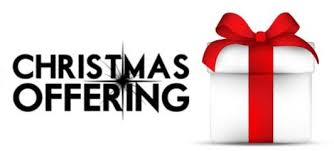
# **Customer Segmentation**

Problem Statement:  XYZ bank wants to roll out Christmas offers to their customers. But Bank does not want to roll out same offer to all customers  instead they want to roll out personalized offer to particular set of customers. If they manually start understanding the category of customer then this will be not efficient and also they will not be able to uncover the hidden pattern in the data ( pattern which group certain kind of customer in one category). Bank approached ABC analytics company to solve their problem. Bank also shared information with ABC analytics that they don't want more than 5 group as this will be inefficient for their campaign.

ML Problem: ABC analytics proposed customer segmentation approach to Bank.

ABC analytics assigned this talk to their analytics team and instructed their team to come up with the approach and feature which group similar behavior customer in one category and others in different category.

Note: Please read problem statement carefully and propose the approach which should be as per the customer requirement.

# **Task:**

1. Business Understanding

2. Data Understanding

3. EDA

4. Feature Engineering

4. Model Building

5. Model Evaluation

6. Presentation (Recommendation slide is must)

7. Document the challenges

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!pip install pycountry_convert

In [ ]:
import pandas as pd
import seaborn as snsda
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
#import pycountry_convert as pc
sns.set(rc={'figure.figsize':(11,9)})
sns.set_theme('notebook')
sns.set_style('white')


In [ ]:
input_file ="/content/drive/MyDrive/Glacier_project/final_data.csv"


In [ ]:
df=pd.read_csv(input_file,index_col=0)
df.head()

,The date contract in the bank,Customer seniority,Age,Gross income of the household,Customer Country residence,channel used by the customer to join,Province name,Customers sex,New customer Index,Customer relation type at the beginning of the month,...,Loans,Taxes,Credit Card,Securities,Payroll,Direct Debit,Deposit Terms,Accounts_counts,Customer code,Date
0,2015-01-12,6.0,35.0,87218.100000,ES,KHL,MALAGA,M,0.0,active,...,0,0,0,0,0.0,0,0,1,1375586,2015-01-28
1,2012-08-10,35.0,23.0,35548.740000,ES,KHE,CIUDAD REAL,F,0.0,inactive,...,0,0,0,0,0.0,0,0,1,1050611,2015-01-28
2,2012-08-10,35.0,23.0,122179.110000,ES,KHE,CIUDAD REAL,F,0.0,inactive,...,0,0,0,0,0.0,0,0,1,1050612,2015-01-28
3,2012-08-10,35.0,22.0,119775.540000,ES,KHD,ZARAGOZA,M,0.0,inactive,...,0,0,0,0,0.0,0,1,0,1050613,2015-01-28
4,2012-08-10,35.0,23.0,109180.902243,ES,KHE,ZARAGOZA,F,0.0,active,...,0,0,0,0,0.0,0,0,1,1050614,2015-01-28


In [ ]:
# descrining the numeric features.
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
The date contract in the bank,996889,6154,2007-07-14,10810,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer seniority,996889.0,NaN,NaN,NaN,96.963789,65.451191,0.0,33.0,96.963789,156.0,246.0
Age,996889.0,NaN,NaN,NaN,43.165739,16.965327,2.0,27.0,43.0,53.0,116.0
Gross income of the household,996889.0,NaN,NaN,NaN,139372.431898,216894.676346,1202.73,78366.27,116317.98,159614.320361,28894395.51
Customer Country residence,996889,112,ES,989955,NaN,NaN,NaN,NaN,NaN,NaN,NaN
channel used by the customer to join,996889,156,KAT,312322,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Province name,996889,51,MADRID,358719,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customers sex,996889,2,F,570586,NaN,NaN,NaN,NaN,NaN,NaN,NaN
New customer Index,996889.0,NaN,NaN,NaN,0.000486,0.022029,0.0,0.0,0.0,0.0,1.0
Customer relation type at the beginning of the month,996889,3,active,556600,NaN,NaN,NaN,NaN,NaN,NaN,NaN


deposit terms features
0    929606 - no term deposit    
3     65322 - long term     
1      1762 -  short term    
2      1679 - medium term    
5      1307 - long and medium term     
4       232 - two different types    
6        92 - two different types of account    

In [ ]:

def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="red"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="rgb"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    #f2.savefig(f'{feature}_hist.png',dpi=200)

In [ ]:
def labeled_barplot(df, feature, perc=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        
        palette="Paired",
        order=df[feature].value_counts().sort_values(ascending=False).index[:n]
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
            
        )  # annotate the percentage

    plt.show()  # show the plot

def plot_box_swarm(data, y_axis_label, x_labels, plot_title, figure_name):
    """Plot box-plot and swarm plot for data list.
 
    Args:
        data (list of list): List of lists with data to be plotted.
        y_axis_label (str): Y- axis label.
        x_labels (list of str): List with labels of x-axis.
        plot_title (str): Plot title.
        figure_name (str): Path to output figure.
         
    """
    seaborn.set(color_codes=True)
    matplotlib.figure(1, figsize=(9, 6))
 
    # add title to plot
    matplotlib.title(plot_title)
 
    # plot data on swarmplot and boxplot
    seaborn.swarmplot(data=data, color=".25")
    ax = seaborn.boxplot(data=data)
 
    # y-axis label
    ax.set(ylabel=y_axis_label)
 
    # write labels with number of elements
    ax.set_xticklabels(["{} (n={})".format(l, len(data[x])) for x, l in enumerate(x_labels)], rotation=10)
 
    # write figure file with quality 400 dpi
    matplotlib.savefig(figure_name, bbox_inches='tight', dpi=400)
    matplotlib.close()

In [ ]:
#choose features for hist plots. 
to_hist=df.select_dtypes('number').nunique().gt(100).astype('int').replace(0,np.nan).dropna().index.tolist()

In [ ]:
to_barplot=df.select_dtypes('number').nunique().lt(100).astype('int').replace(0,np.nan).dropna().index.tolist()

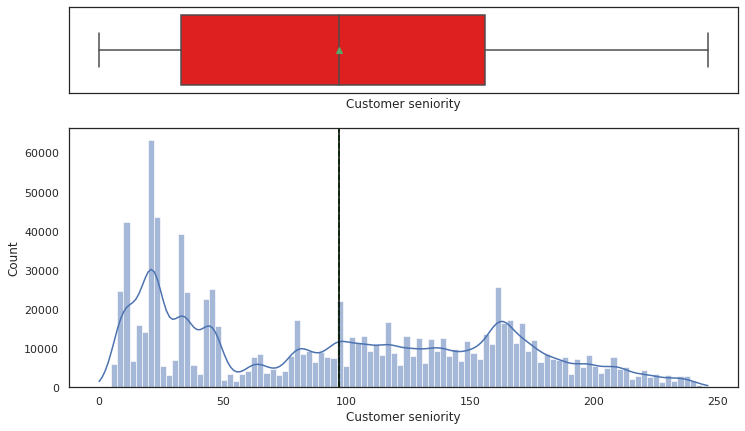

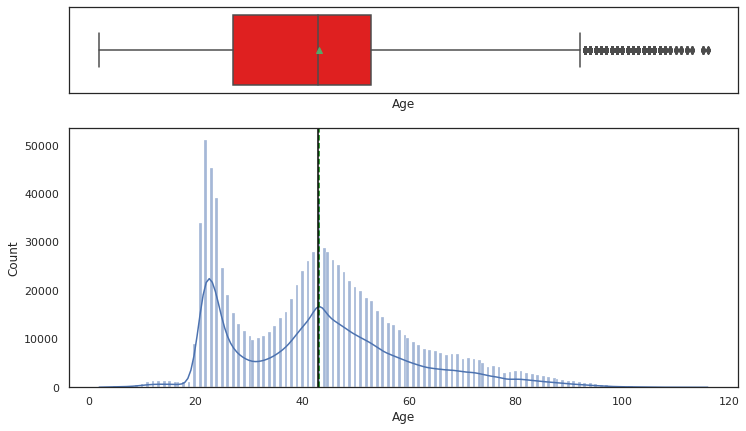

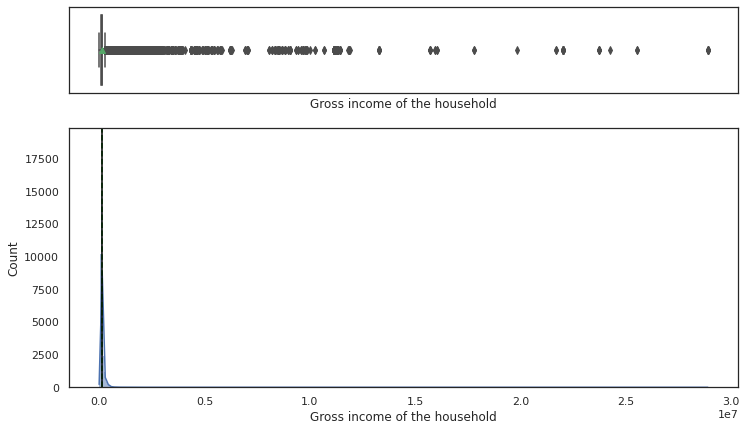

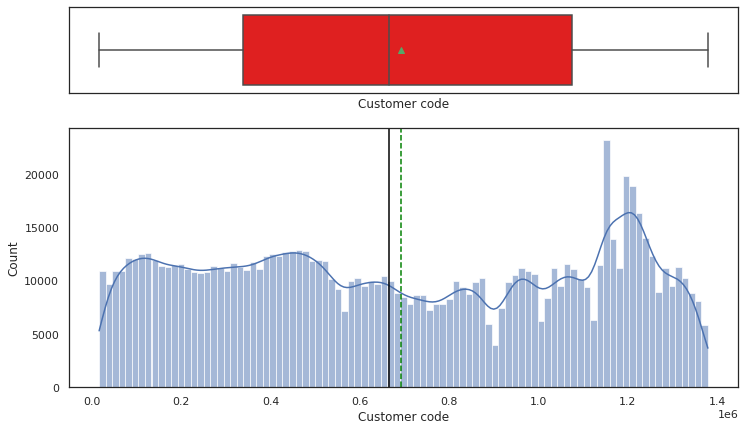

In [ ]:
for col in df[to_hist] :
    histogram_boxplot(df,col,kde=True)
# Customer seniourity show two peaks, at 25 monht , and 175 month, and mean 100 month  
# Gross income shows wide range of values. 
# customer code histogram show that some costomer code was repeated.    

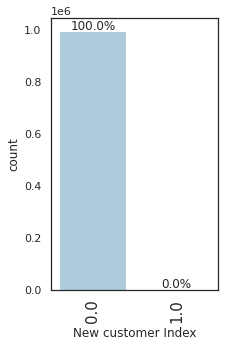

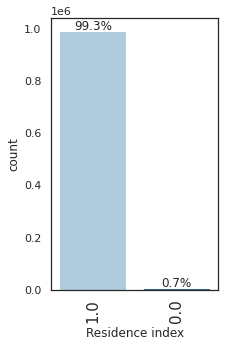

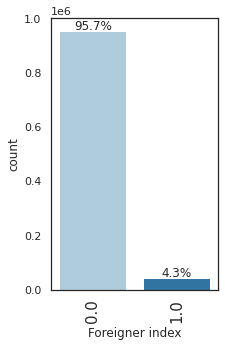

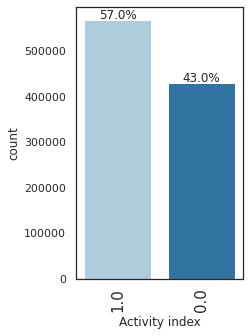

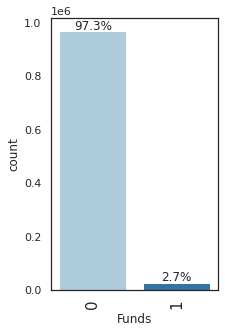

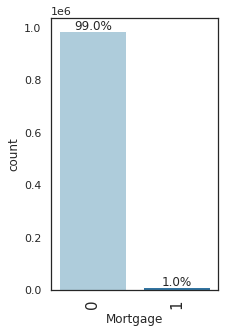

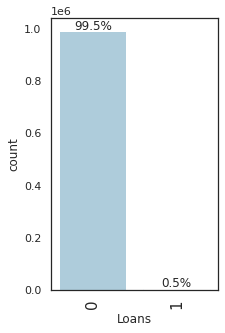

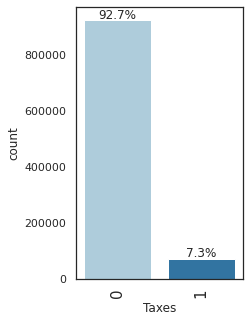

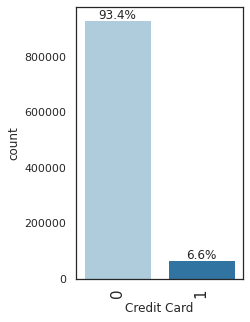

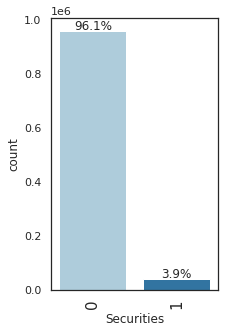

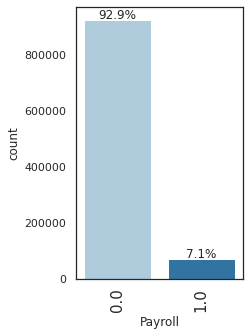

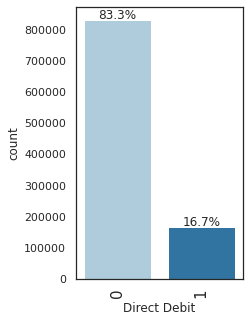

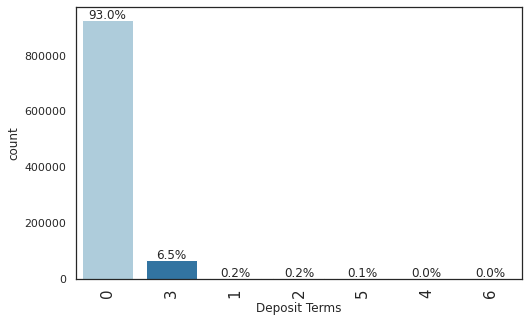

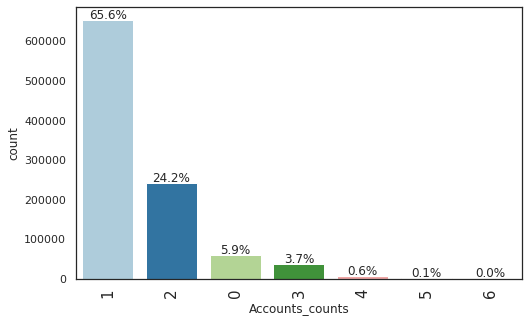

In [ ]:
for col in df[to_barplot] :
    labeled_barplot(df,col)


 

## Observations: 
new cusomer index could be delete.    
56% of acount is active.    
92% of acounts are payroll.   
98% are resiidence in the same place of account.    
only 4.3% are foreigner accounts.    
2.7% of the acount are for funds, 1% for mortgage,
0.5% for loans, 7.3% for taxes, 6.6 for Credit Card, 3.9 for securities, 16.7%  for direct debit.   
93% has no term deposit, 6.3% has long term deposit.   
5.9% have no accounts and 65% of customers has one accounts while 24% has 3 accounts.   


In [ ]:
to_barplot_obj=df.select_dtypes('object').nunique().lt(50).astype('int').replace(0,np.nan).dropna().index.tolist()

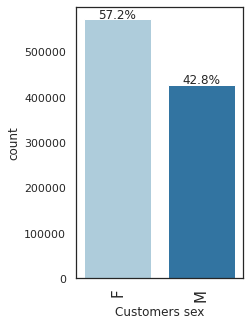

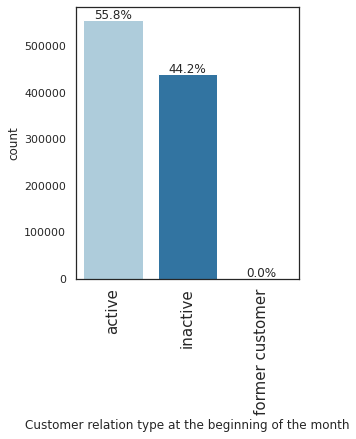

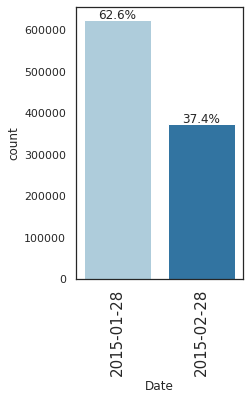

In [ ]:
for col in df[to_barplot_obj] :
    labeled_barplot(df,col)

### Observation 
57% of customers are female.   
55% has active acount, while 44% has inactive acount at the beginning of the month.     
This data was collected at beginning of two months, 62% at Janualy and 37 % at Ferbrualy 2015.    


In [ ]:
df['Customer Country residence'].value_counts(normalize=True)	

ES    0.993044
FR    0.000544
AR    0.000540
DE    0.000485
GB    0.000481
        ...   
TG    0.000002
TN    0.000002
LB    0.000002
BZ    0.000002
AL    0.000001
Name: Customer Country residence, Length: 112, dtype: float64

In [ ]:
# since 99.29 % is in Spain will merage all other countries.
df['Customer Country residence_ES']=df['Customer Country residence'].mask(df['Customer Country residence']!='ES','Non_ES')

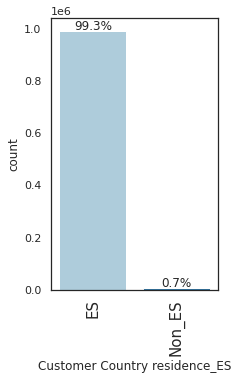

In [ ]:
labeled_barplot(df,'Customer Country residence_ES')

In [ ]:
df.select_dtypes('object').nunique()

The date contract in the bank                           6154
Customer Country residence                               112
channel used by the customer to join                     156
Province name                                             51
Customers sex                                              2
Customer relation type at the beginning of the month       3
Date                                                       2
Customer Country residence_ES                              2
dtype: int64

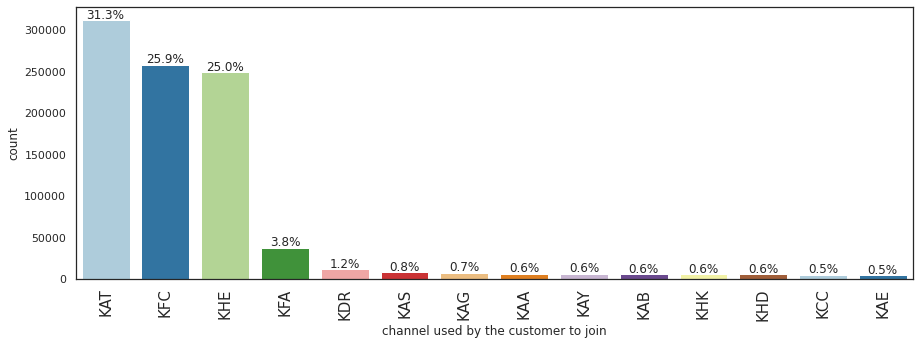

In [ ]:
labeled_barplot(df,'channel used by the customer to join',n=14)

In [ ]:
country_province=pd.DataFrame(df.groupby(by=['Customer Country residence','Province name']).count()['Age'])

In [ ]:
#plot heat map to see which province exist in different country

In [ ]:
country_province=df.reset_index().pivot_table(columns=['Customer Country residence'],index=['Province name'],values='Age',aggfunc='count')

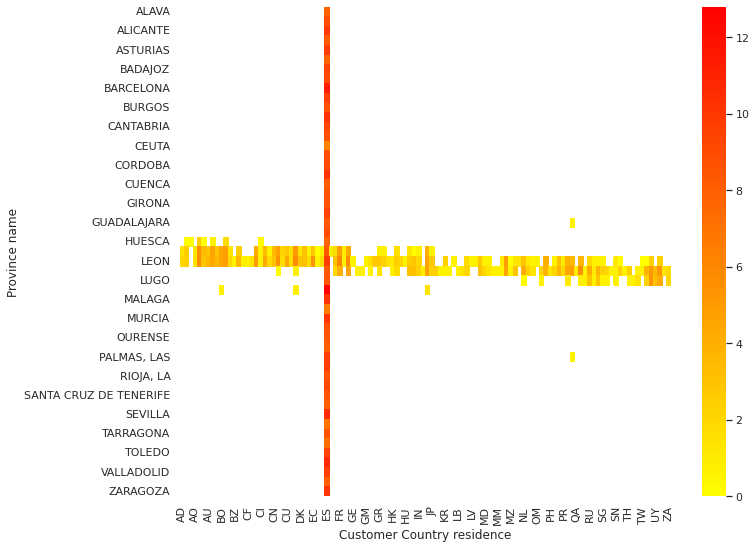

In [ ]:

sns.heatmap(np.log(country_province),cmap='autumn_r')

In [ ]:
country_province.loc['MADRID',:].dropna()

Customer Country residence
BO         2.0
DE         2.0
ES    358711.0
IT         4.0
Name: MADRID, dtype: float64

## Observation:
80% of the channel used by customers to join are KAT,KFC,KHE,KFA. the rest of the channel composes the ...   

99% of customer in Espain, the 0.1 around the world. so we collect all the country to Espain and non spain.    

most of the province located in spain. however, there are few province that has the same name in spain and other county. e.g. LERIDA,HUELVA. and  Madrid





# Bivariant Analysis

In [ ]:
df.dtypes

The date contract in the bank                            object
Customer seniority                                      float64
Age                                                     float64
Gross income of the household                           float64
Customer Country residence                               object
channel used by the customer to join                     object
Province name                                            object
Customers sex                                            object
New customer Index                                      float64
Customer relation type at the beginning of the month     object
Residence index                                         float64
Foreigner index                                         float64
Activity index                                          float64
Funds                                                     int64
Mortgage                                                  int64
Loans                                   

In [ ]:
df.Date.value_counts()

2015-01-28    623872
2015-02-28    373017
Name: Date, dtype: int64

In [ ]:
def stacked_barplot(data, predictor, target,color=['black','red']):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
   
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5),color=color)
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.xlabel('{}'.format(predictor.replace('_',' ').title()))
    plt.ylabel('{}'.format(target.replace('_',' ').title()))
    
    SMALL_SIZE = 12
    MEDIUM_SIZE = 14
    BIGGER_SIZE = 24
    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    #plt.savefig(predictor+target+'_stakedbars.png',bbox_inches='tight') # save
    plt.show() 

Activity index     0.0     1.0     All
Customers sex                         
All             429084  567805  996889
F               230734  339852  570586
M               198350  227953  426303
------------------------------------------------------------------------------------------------------------------------


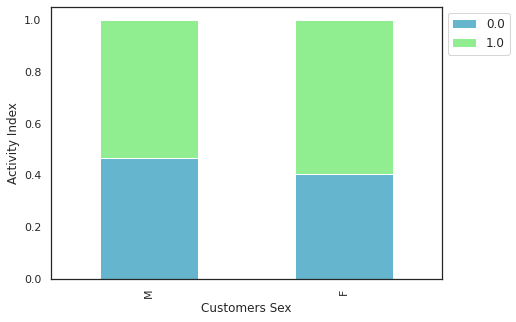

In [ ]:
stacked_barplot(df,'Customers sex','Activity index',color=['c','lightgreen'])

Activity index      0.0     1.0     All
Accounts_counts                        
All              429084  567805  996889
1                356714  296864  653578
2                 36906  204355  241261
0                 34514   24479   58993
3                   932   35791   36723
4                    18    5620    5638
5                     0     668     668
6                     0      28      28
------------------------------------------------------------------------------------------------------------------------


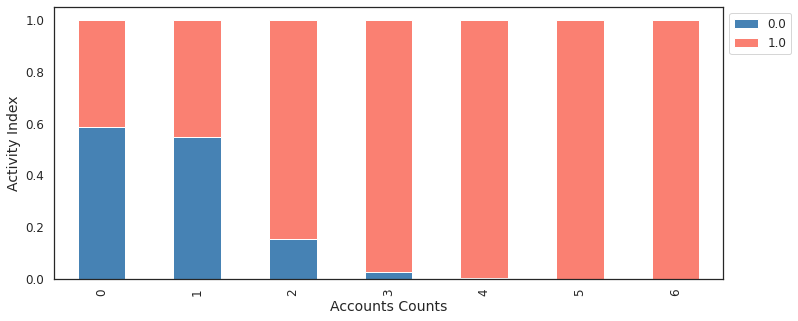

In [ ]:
stacked_barplot(df,'Accounts_counts','Activity index',color=['steelblue','salmon'])

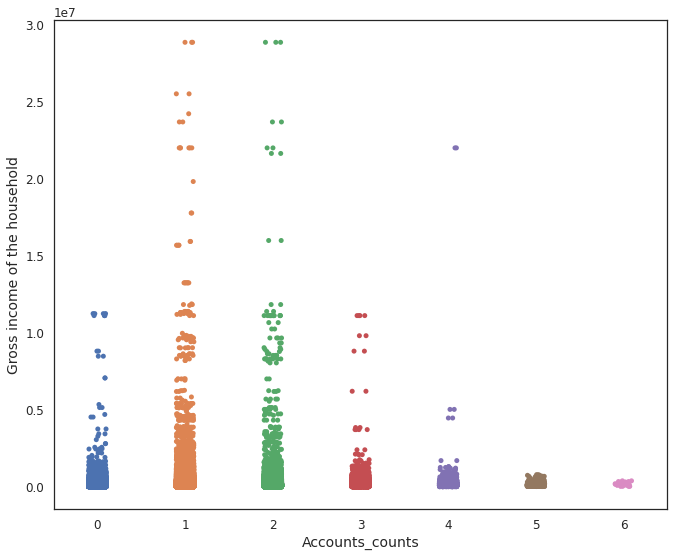

In [ ]:
sns.stripplot(data=df,y='Gross income of the household',x='Accounts_counts')

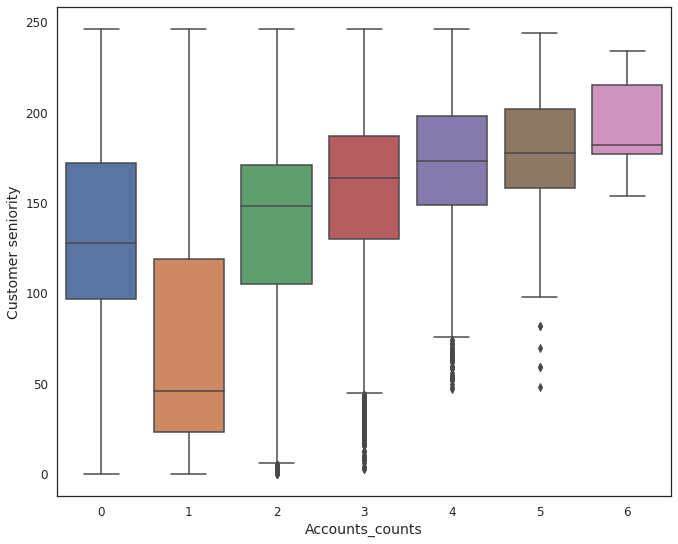

In [ ]:
sns.boxplot(data=df,y='Customer seniority',x='Accounts_counts')

In [ ]:
dummy1=['Mortgage','Loans','Taxes','Funds',
'Credit Card','Payroll','Direct Debit','Securities']

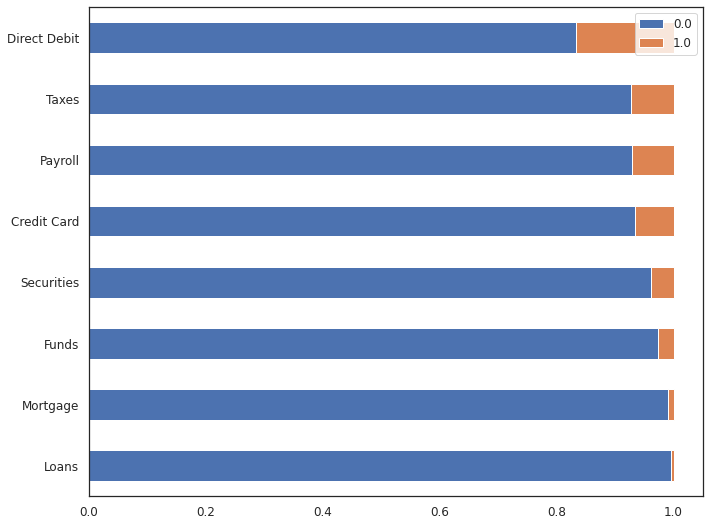

In [ ]:
df[dummy1].apply(pd.Series.value_counts,normalize=True).T.sort_values(by=1.0,ascending=True).plot.barh(stacked=True)  

### observation 
loans,Mortgage, Securities and fund are the most populars with  100%, 99%,97%,and 96%.
so we can delete Loans featur.    
acount_counts  with 1 and 2 have the highest gross income. while acount count 1 has the lowest senioritity. the more acount number the more seiniourity.     
when they have less than 2 account counts they are 60% inactive. 

Text(0.5, 1.0, 'Pearson correlation')

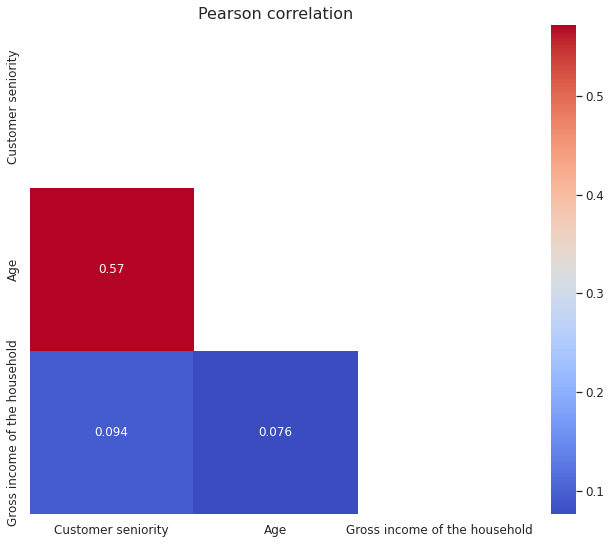

In [ ]:
mask=np.triu(df[['Customer seniority','Age','Gross income of the household']].corr())

sns.heatmap(df[['Customer seniority','Age','Gross income of the household']].corr(), mask=mask,cmap='coolwarm',annot=True)
plt.title('Pearson correlation',fontsize=16)

In [ ]:
ff=pd.crosstab(index=df['Customers sex'], columns=df['Deposit Terms'],normalize=True)

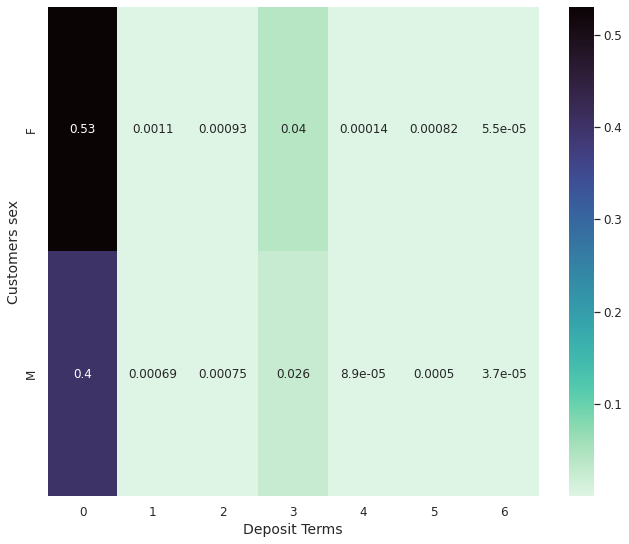

In [ ]:
sns.heatmap(ff,cmap='mako_r',annot=True)

In [ ]:
df_date=df.set_index('The date contract in the bank').sort_index()

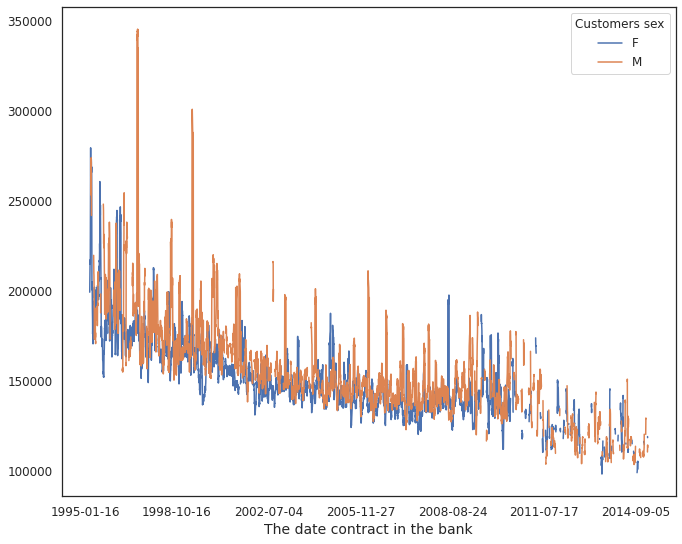

In [ ]:
df_date.pivot_table(values='Gross income of the household', index='The date contract in the bank', columns=['Customers sex'], aggfunc=lambda x:np.mean(x)).rolling(15).mean().plot.line()

### Observation 
0,1,3 deposit terms has higher inactive accounts than the ohers.    
over years the Male customers have higher gross income than female. the differecnss started decrease since 2002 

In [ ]:
obj_data=df[["Residence index","Foreigner index","Activity index","Funds","Mortgage","Loans","Taxes","Credit Card","Securities","Payroll","Direct Debit","Deposit Terms","Accounts_counts"]]


In [ ]:
from sklearn.feature_selection import chi2

resultant = pd.DataFrame(data=[(0 for i in range(len(obj_data.columns))) for i in range(len(obj_data.columns))], 
columns=list(obj_data.columns))
resultant.set_index(pd.Index(list(obj_data.columns)), inplace = True)

# Finding p_value for all columns 
for i in list(obj_data.columns):
    for j in list(obj_data.columns):
        if i != j:
            chi2_val, p_val = chi2(np.array(obj_data[i]).reshape(-1, 1), np.array(df[j]).reshape(-1, 1))
            resultant.loc[i,j] = p_val

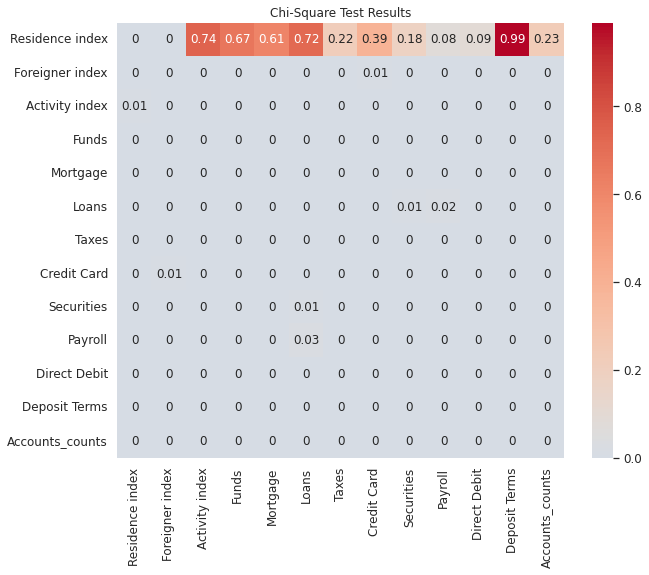

In [ ]:
# valuas <0.05 are depended features , vlaues >0.05 are independed features
# Plotting a heatmap
import seaborn as sns
fig = plt.figure(figsize=(10,8))
sns.heatmap(np.round(resultant,2), annot=True, cmap='coolwarm',center=0.05)
plt.title('Chi-Square Test Results')
plt.show()